# Largest topic

Converted to script.
* TODO: make more generic such that it can be applied to any topic (not just the largest one)

Change in biggest topic overall's sentiment over time (per segment)


# Get largest topic

## Get data

In [1]:
import pandas as pd
import numpy as np

In [2]:
INPUT_FILE = "../BTM_topics/dataout/11_model_scores.csv"

In [3]:
df = pd.read_csv(INPUT_FILE)
df

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,1.356090e+18,4.272922e-04,1.158977e-03,3.049653e-07,0.017201,8.847098e-04,0.753780,0.007015,3.048808e-07,3.049972e-07,0.047729,0.171803
1,1.356173e+18,3.089498e-05,4.447799e-04,3.506210e-08,0.001959,6.504732e-05,0.006232,0.000001,1.513071e-02,2.764870e-05,0.912753,0.063357
2,1.356193e+18,3.686866e-06,3.886570e-06,2.596441e-03,0.015721,1.258273e-05,0.065319,0.000320,8.972749e-06,1.676104e-06,0.003243,0.912770
3,1.356197e+18,3.071782e-07,1.776129e-06,4.853164e-06,0.000003,5.284939e-07,0.858915,0.004685,1.123627e-04,2.129815e-07,0.042014,0.094263
4,1.356204e+18,2.392368e-07,1.211519e-06,1.981567e-05,0.000026,8.176014e-07,0.395579,0.000006,2.594170e-04,1.945675e-07,0.104559,0.499547
...,...,...,...,...,...,...,...,...,...,...,...,...
406016,1.399516e+18,7.341263e-06,9.248494e-06,4.178257e-03,0.002163,1.202359e-05,0.331536,0.000095,7.723829e-06,5.048778e-06,0.006860,0.655127
406017,1.399516e+18,3.948523e-07,1.035067e-09,1.895095e-10,0.000270,2.010652e-10,0.997930,0.000117,2.776966e-05,1.443563e-03,0.000131,0.000080
406018,1.399516e+18,5.348920e-06,6.175642e-07,4.199903e-04,0.008041,2.047870e-06,0.003437,0.000383,1.589794e-07,1.399002e-07,0.001906,0.985806
406019,1.399516e+18,1.229653e-06,1.319369e-05,3.515787e-03,0.018589,4.196436e-06,0.081792,0.000107,2.994176e-06,5.589861e-07,0.008034,0.887940


In [4]:
# change index
df = df.rename({'Unnamed: 0': 'id'}, axis=1) # rename column
df['id'] = df['id'].astype('int64')
df.set_index("id", inplace = True)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
id,,,,,,,,,,,
1356089513857208320,4.272922e-04,1.158977e-03,3.049653e-07,0.017201,8.847098e-04,0.753780,0.007015,3.048808e-07,3.049972e-07,0.047729,0.171803
1356172769424244736,3.089498e-05,4.447799e-04,3.506210e-08,0.001959,6.504732e-05,0.006232,0.000001,1.513071e-02,2.764870e-05,0.912753,0.063357
1356193045817872384,3.686866e-06,3.886570e-06,2.596441e-03,0.015721,1.258273e-05,0.065319,0.000320,8.972749e-06,1.676104e-06,0.003243,0.912770
1356197080272752640,3.071782e-07,1.776129e-06,4.853164e-06,0.000003,5.284939e-07,0.858915,0.004685,1.123627e-04,2.129815e-07,0.042014,0.094263
1356203583193063424,2.392368e-07,1.211519e-06,1.981567e-05,0.000026,8.176014e-07,0.395579,0.000006,2.594170e-04,1.945675e-07,0.104559,0.499547
...,...,...,...,...,...,...,...,...,...,...,...
1399515723274280704,7.341263e-06,9.248494e-06,4.178257e-03,0.002163,1.202359e-05,0.331536,0.000095,7.723829e-06,5.048778e-06,0.006860,0.655127
1399515734007447552,3.948523e-07,1.035067e-09,1.895095e-10,0.000270,2.010652e-10,0.997930,0.000117,2.776966e-05,1.443563e-03,0.000131,0.000080
1399515936093204480,5.348920e-06,6.175642e-07,4.199903e-04,0.008041,2.047870e-06,0.003437,0.000383,1.589794e-07,1.399002e-07,0.001906,0.985806


In [5]:
# rename column headers
for i in range(1, len(df.columns) + 1):
    colname = "V" + str(i)
    df = df.rename({colname: i}, axis=1)
df

,1,2,3,4,5,6,7,8,9,10,11
id,,,,,,,,,,,
1356089513857208320,4.272922e-04,1.158977e-03,3.049653e-07,0.017201,8.847098e-04,0.753780,0.007015,3.048808e-07,3.049972e-07,0.047729,0.171803
1356172769424244736,3.089498e-05,4.447799e-04,3.506210e-08,0.001959,6.504732e-05,0.006232,0.000001,1.513071e-02,2.764870e-05,0.912753,0.063357
1356193045817872384,3.686866e-06,3.886570e-06,2.596441e-03,0.015721,1.258273e-05,0.065319,0.000320,8.972749e-06,1.676104e-06,0.003243,0.912770
1356197080272752640,3.071782e-07,1.776129e-06,4.853164e-06,0.000003,5.284939e-07,0.858915,0.004685,1.123627e-04,2.129815e-07,0.042014,0.094263
1356203583193063424,2.392368e-07,1.211519e-06,1.981567e-05,0.000026,8.176014e-07,0.395579,0.000006,2.594170e-04,1.945675e-07,0.104559,0.499547
...,...,...,...,...,...,...,...,...,...,...,...
1399515723274280704,7.341263e-06,9.248494e-06,4.178257e-03,0.002163,1.202359e-05,0.331536,0.000095,7.723829e-06,5.048778e-06,0.006860,0.655127
1399515734007447552,3.948523e-07,1.035067e-09,1.895095e-10,0.000270,2.010652e-10,0.997930,0.000117,2.776966e-05,1.443563e-03,0.000131,0.000080
1399515936093204480,5.348920e-06,6.175642e-07,4.199903e-04,0.008041,2.047870e-06,0.003437,0.000383,1.589794e-07,1.399002e-07,0.001906,0.985806


## Allocate topic to tweet
Get the topic that a tweet is most likely part of based on the probablity that they're in the topic

In [6]:
maxtopic = df
# get the topic with the max probability value for each row
maxtopic = maxtopic.idxmax(axis=1)
# convert all topics from string ('15') to int (15). This prerpares it for grouping by topic
maxtopic = maxtopic.astype(int)

In [7]:
# add maxtopic as a new column
df.insert(0, "maxtopic", maxtopic)
df

,maxtopic,1,2,3,4,5,6,7,8,9,10,11
id,,,,,,,,,,,,
1356089513857208320,6,4.272922e-04,1.158977e-03,3.049653e-07,0.017201,8.847098e-04,0.753780,0.007015,3.048808e-07,3.049972e-07,0.047729,0.171803
1356172769424244736,10,3.089498e-05,4.447799e-04,3.506210e-08,0.001959,6.504732e-05,0.006232,0.000001,1.513071e-02,2.764870e-05,0.912753,0.063357
1356193045817872384,11,3.686866e-06,3.886570e-06,2.596441e-03,0.015721,1.258273e-05,0.065319,0.000320,8.972749e-06,1.676104e-06,0.003243,0.912770
1356197080272752640,6,3.071782e-07,1.776129e-06,4.853164e-06,0.000003,5.284939e-07,0.858915,0.004685,1.123627e-04,2.129815e-07,0.042014,0.094263
1356203583193063424,11,2.392368e-07,1.211519e-06,1.981567e-05,0.000026,8.176014e-07,0.395579,0.000006,2.594170e-04,1.945675e-07,0.104559,0.499547
...,...,...,...,...,...,...,...,...,...,...,...,...
1399515723274280704,11,7.341263e-06,9.248494e-06,4.178257e-03,0.002163,1.202359e-05,0.331536,0.000095,7.723829e-06,5.048778e-06,0.006860,0.655127
1399515734007447552,6,3.948523e-07,1.035067e-09,1.895095e-10,0.000270,2.010652e-10,0.997930,0.000117,2.776966e-05,1.443563e-03,0.000131,0.000080
1399515936093204480,11,5.348920e-06,6.175642e-07,4.199903e-04,0.008041,2.047870e-06,0.003437,0.000383,1.589794e-07,1.399002e-07,0.001906,0.985806


In [8]:
# sort by maxtopic
df = df.sort_values('maxtopic')
df

,maxtopic,1,2,3,4,5,6,7,8,9,10,11
id,,,,,,,,,,,,
1394208313840062464,1,9.960035e-01,5.097544e-04,3.274219e-11,2.902486e-06,3.105413e-11,3.460692e-04,1.776899e-07,5.934027e-09,1.131861e-13,0.002928,2.097359e-04
1373648795569778688,1,9.998467e-01,7.804184e-07,1.164861e-09,5.807009e-08,1.484454e-10,2.044988e-07,2.779351e-09,1.870698e-08,2.146993e-06,0.000150,5.220320e-07
1373649046003347456,1,9.998467e-01,7.804184e-07,1.164861e-09,5.807009e-08,1.484454e-10,2.044988e-07,2.779351e-09,1.870698e-08,2.146993e-06,0.000150,5.220320e-07
1393798580012465920,1,9.960035e-01,5.097544e-04,3.274219e-11,2.902486e-06,3.105413e-11,3.460692e-04,1.776899e-07,5.934027e-09,1.131861e-13,0.002928,2.097359e-04
1373649410467328000,1,9.998467e-01,7.804184e-07,1.164861e-09,5.807009e-08,1.484454e-10,2.044988e-07,2.779351e-09,1.870698e-08,2.146993e-06,0.000150,5.220320e-07
...,...,...,...,...,...,...,...,...,...,...,...,...
1391068512550936320,11,2.463335e-07,2.737032e-06,3.655700e-04,4.245677e-03,1.056040e-06,1.611315e-02,1.008276e-01,8.342596e-06,1.119578e-07,0.026328,8.521075e-01
1391068467332206336,11,2.463335e-07,2.737032e-06,3.655700e-04,4.245677e-03,1.056040e-06,1.611315e-02,1.008276e-01,8.342596e-06,1.119578e-07,0.026328,8.521075e-01
1391068452647886848,11,3.422085e-05,4.881761e-06,6.409120e-04,5.752629e-02,4.826721e-05,9.804976e-02,6.584947e-04,9.041790e-06,4.496543e-06,0.001782,8.412415e-01


## Get the largest topic
Topic with the most tweets having the highest probability of being in it

In [9]:
# count the number of tweets per topic (and sort in descending order)
topic_counts = df['maxtopic'].value_counts()
topic_counts

11    121144
6      75836
1      38567
9      36918
5      36494
10     32161
7      29644
4      14986
3       8812
2       7918
8       3541
Name: maxtopic, dtype: int64

In [10]:
# get max topic
max_topic = topic_counts.index[0]
max_topic

11

### Plot topic distribution data

Count the number of occurences of each topic and plot

In [11]:
# count the number of tweets per topic using Counter
from collections import Counter
topic2occurrences = Counter(df['maxtopic'])
topic2occurrences

Counter({1: 38567,
         2: 7918,
         3: 8812,
         4: 14986,
         5: 36494,
         6: 75836,
         7: 29644,
         8: 3541,
         9: 36918,
         10: 32161,
         11: 121144})

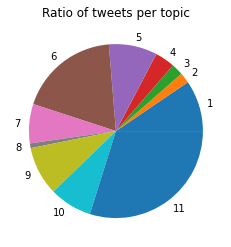

In [12]:
# Plot ratio of tweets per topic
import matplotlib.pyplot as plt
import numpy as np

ys = []
labels = []
for topic, occurrences in topic2occurrences.items():
    labels.append(topic)
    ys.append(occurrences)

plt.pie(ys, labels=labels)
plt.title('Ratio of tweets per topic')
plt.show() 

## Extract max topic tweet IDs

In [13]:
df

,maxtopic,1,2,3,4,5,6,7,8,9,10,11
id,,,,,,,,,,,,
1394208313840062464,1,9.960035e-01,5.097544e-04,3.274219e-11,2.902486e-06,3.105413e-11,3.460692e-04,1.776899e-07,5.934027e-09,1.131861e-13,0.002928,2.097359e-04
1373648795569778688,1,9.998467e-01,7.804184e-07,1.164861e-09,5.807009e-08,1.484454e-10,2.044988e-07,2.779351e-09,1.870698e-08,2.146993e-06,0.000150,5.220320e-07
1373649046003347456,1,9.998467e-01,7.804184e-07,1.164861e-09,5.807009e-08,1.484454e-10,2.044988e-07,2.779351e-09,1.870698e-08,2.146993e-06,0.000150,5.220320e-07
1393798580012465920,1,9.960035e-01,5.097544e-04,3.274219e-11,2.902486e-06,3.105413e-11,3.460692e-04,1.776899e-07,5.934027e-09,1.131861e-13,0.002928,2.097359e-04
1373649410467328000,1,9.998467e-01,7.804184e-07,1.164861e-09,5.807009e-08,1.484454e-10,2.044988e-07,2.779351e-09,1.870698e-08,2.146993e-06,0.000150,5.220320e-07
...,...,...,...,...,...,...,...,...,...,...,...,...
1391068512550936320,11,2.463335e-07,2.737032e-06,3.655700e-04,4.245677e-03,1.056040e-06,1.611315e-02,1.008276e-01,8.342596e-06,1.119578e-07,0.026328,8.521075e-01
1391068467332206336,11,2.463335e-07,2.737032e-06,3.655700e-04,4.245677e-03,1.056040e-06,1.611315e-02,1.008276e-01,8.342596e-06,1.119578e-07,0.026328,8.521075e-01
1391068452647886848,11,3.422085e-05,4.881761e-06,6.409120e-04,5.752629e-02,4.826721e-05,9.804976e-02,6.584947e-04,9.041790e-06,4.496543e-06,0.001782,8.412415e-01


In [14]:
max_topic_df = df.loc[df['maxtopic'] == max_topic]
max_topic_df

,maxtopic,1,2,3,4,5,6,7,8,9,10,11
id,,,,,,,,,,,,
1397474559251476480,11,1.068515e-05,2.514835e-06,0.010326,0.071335,0.000007,0.169605,0.000040,0.000003,1.666590e-02,0.054935,0.677070
1397474456101027840,11,4.137151e-06,9.604743e-06,0.089438,0.069977,0.000004,0.291425,0.000044,0.000002,3.500823e-03,0.004061,0.541535
1397204829676650496,11,1.140926e-05,1.533113e-05,0.001803,0.043243,0.000016,0.103894,0.000220,0.000003,1.499402e-06,0.005584,0.845209
1390253049852039168,11,3.686866e-06,3.886570e-06,0.002596,0.015721,0.000013,0.065319,0.000320,0.000009,1.676104e-06,0.003243,0.912770
1397458349927641088,11,3.422085e-05,4.881761e-06,0.000641,0.057526,0.000048,0.098050,0.000658,0.000009,4.496543e-06,0.001782,0.841242
...,...,...,...,...,...,...,...,...,...,...,...,...
1391068512550936320,11,2.463335e-07,2.737032e-06,0.000366,0.004246,0.000001,0.016113,0.100828,0.000008,1.119578e-07,0.026328,0.852107
1391068467332206336,11,2.463335e-07,2.737032e-06,0.000366,0.004246,0.000001,0.016113,0.100828,0.000008,1.119578e-07,0.026328,0.852107
1391068452647886848,11,3.422085e-05,4.881761e-06,0.000641,0.057526,0.000048,0.098050,0.000658,0.000009,4.496543e-06,0.001782,0.841242


## Output max topic df IDs to csv

In [15]:
TOPIC_ID_OUT = "../datain/sentiment/maxtopic-ids.csv"

In [16]:
# export selected columns to csv
selected_columns = []
max_topic_df.to_csv(TOPIC_ID_OUT, columns = selected_columns)

# Sentiment analysis

## Get tweets from IDs

The topic modelling largest topic output is a csv with a list of IDs for the largest topic, so the goal here is to take those IDs and get the associated cleaned sentiment tweets from them such that we can apply sentiment analysis for the largest topic.

In [17]:
import os # creating directories
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# load cleaned tweet corpus data
cleaned_sentiment_df = pd.read_csv("../datain/sentiment/cleaned_tweets_for_sentiment.csv")
cleaned_sentiment_df = cleaned_sentiment_df.drop("Unnamed: 0", axis=1)
cleaned_sentiment_df

,created_at,id,cleaned_tweet
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project! reset
2,2021-05-31 23:59:35+00:00,1399515936093204480,such a beautiful project and congratulations t...
3,2021-05-31 23:58:47+00:00,1399515734007447552,i am participating in the cryptoultraman nft a...
4,2021-05-31 23:58:44+00:00,1399515723274280960,"nice to find this project, this project will b..."
...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena
407486,2021-02-01 10:49:53+00:00,1356193045817872384,a great project
407487,2021-02-01 09:29:19+00:00,1356172769424244736,how are nft rates determined? higher nft chanc...


In [19]:
max_topic_ids = pd.read_csv(TOPIC_ID_OUT)
max_topic_ids

,id
0,1397474559251476480
1,1397474456101027840
2,1397204829676650496
3,1390253049852039168
4,1397458349927641088
...,...
121139,1391068512550936320
121140,1391068467332206336
121141,1391068452647886848
121142,1396100690334732288


In [20]:
largest_topic_sentiment_df = max_topic_ids.merge(cleaned_sentiment_df, on='id', how='left')
largest_topic_sentiment_df

,id,created_at,cleaned_tweet
0,1397474559251476480,2021-05-26 08:47:53+00:00,im proud to participate in biggest project !
1,1397474456101027840,2021-05-26 08:47:28+00:00,with the opportunity to take part in this aird...
2,1397204829676650496,2021-05-25 14:56:04+00:00,good project reset
3,1390253049852039168,2021-05-06 10:32:11+00:00,great project .
4,1397458349927641088,2021-05-26 07:43:28+00:00,good project
...,...,...,...
121140,1391068512550936320,NaN,NaN
121141,1391068467332206336,NaN,NaN
121142,1391068452647886848,2021-05-08 16:32:18+00:00,good project
121143,1396100690334732288,2021-05-22 13:48:37+00:00,"good project and strong team, in a predictable..."


## Export largest topic tweets to csv

In [21]:
LARGEST_TOPIC_DATA_OUT = "../datain/topic_modelling/cleaned_tweets_largest_topic.csv"

In [22]:
largest_topic_sentiment_df.to_csv(LARGEST_TOPIC_DATA_OUT)

## Clean dataframe

In [23]:
df = largest_topic_sentiment_df

In [24]:
# remove all null created_at values from dataframe
df = df.drop(df[df['created_at'].isnull()].index)
df = df.drop(df[df['cleaned_tweet'].isnull()].index)
# ensure that all values in created_at has 2021 (and not random strings)
df = df[df['created_at'].str.contains("2021")]

In [25]:
# split created_at into date and time columns
#https://intellipaat.com/community/13909/python-how-can-i-split-a-column-with-both-date-and-time-e-g-2019-07-02-00-12-32-utc-into-two-separate-columns
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.date
df['time'] = df['created_at'].dt.time

In [26]:
df["cleaned_tweet"].astype(str)

0              im proud to participate in biggest project !
1         with the opportunity to take part in this aird...
2                                        good project reset
3                                           great project .
4                                              good project
                                ...                        
121138                         strong project and good team
121139                         strong project and good team
121142                                         good project
121143    good project and strong team, in a predictable...
121144                                         good project
Name: cleaned_tweet, Length: 100879, dtype: object

In [27]:
df.dtypes

id                             int64
created_at       datetime64[ns, UTC]
cleaned_tweet                 object
date                          object
time                          object
dtype: object

## Sentiment: apply polarity score

In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [29]:
# add polarity scores to df
# https://github.com/sidneykung/twitter_hate_speech_detection/blob/master/preprocessing/VADER_sentiment.ipynb
pol = lambda x: analyzer.polarity_scores(x)
df['polarity'] = df["cleaned_tweet"].apply(pol)
df

,id,created_at,cleaned_tweet,date,time,polarity
0,1397474559251476480,2021-05-26 08:47:53+00:00,im proud to participate in biggest project !,2021-05-26,08:47:53,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp..."
1,1397474456101027840,2021-05-26 08:47:28+00:00,with the opportunity to take part in this aird...,2021-05-26,08:47:28,"{'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'comp..."
2,1397204829676650496,2021-05-25 14:56:04+00:00,good project reset,2021-05-25,14:56:04,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp..."
3,1390253049852039168,2021-05-06 10:32:11+00:00,great project .,2021-05-06,10:32:11,"{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp..."
4,1397458349927641088,2021-05-26 07:43:28+00:00,good project,2021-05-26,07:43:28,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp..."
...,...,...,...,...,...,...
121138,1391068583472553984,2021-05-08 16:32:49+00:00,strong project and good team,2021-05-08,16:32:49,"{'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'comp..."
121139,1391068541483462656,2021-05-08 16:32:39+00:00,strong project and good team,2021-05-08,16:32:39,"{'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'comp..."
121142,1391068452647886848,2021-05-08 16:32:18+00:00,good project,2021-05-08,16:32:18,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp..."
121143,1396100690334732288,2021-05-22 13:48:37+00:00,"good project and strong team, in a predictable...",2021-05-22,13:48:37,"{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'comp..."


In [30]:
# split polarity scores into separate columns
df = pd.concat([df.drop(['polarity'], axis=1), df['polarity'].apply(pd.Series)], axis=1)
df

,id,created_at,cleaned_tweet,date,time,neg,neu,pos,compound
0,1397474559251476480,2021-05-26 08:47:53+00:00,im proud to participate in biggest project !,2021-05-26,08:47:53,0.0,0.674,0.326,0.5255
1,1397474456101027840,2021-05-26 08:47:28+00:00,with the opportunity to take part in this aird...,2021-05-26,08:47:28,0.0,0.688,0.312,0.8748
2,1397204829676650496,2021-05-25 14:56:04+00:00,good project reset,2021-05-25,14:56:04,0.0,0.408,0.592,0.4404
3,1390253049852039168,2021-05-06 10:32:11+00:00,great project .,2021-05-06,10:32:11,0.0,0.328,0.672,0.6249
4,1397458349927641088,2021-05-26 07:43:28+00:00,good project,2021-05-26,07:43:28,0.0,0.256,0.744,0.4404
...,...,...,...,...,...,...,...,...,...
121138,1391068583472553984,2021-05-08 16:32:49+00:00,strong project and good team,2021-05-08,16:32:49,0.0,0.326,0.674,0.7351
121139,1391068541483462656,2021-05-08 16:32:39+00:00,strong project and good team,2021-05-08,16:32:39,0.0,0.326,0.674,0.7351
121142,1391068452647886848,2021-05-08 16:32:18+00:00,good project,2021-05-08,16:32:18,0.0,0.256,0.744,0.4404
121143,1396100690334732288,2021-05-22 13:48:37+00:00,"good project and strong team, in a predictable...",2021-05-22,13:48:37,0.0,0.754,0.246,0.8316


## Sentiment: round polarity

In [31]:
def calc_polarity(x, bound):
    if x < -bound:
        return -1
    elif x > bound:
        return 1
    else:
        return 0

round_pol = lambda x: calc_polarity(x, 0.05)

In [32]:
# round polarity up/down
df['rounded_polarity'] = df['compound'].apply(round_pol)
df

,id,created_at,cleaned_tweet,date,time,neg,neu,pos,compound,rounded_polarity
0,1397474559251476480,2021-05-26 08:47:53+00:00,im proud to participate in biggest project !,2021-05-26,08:47:53,0.0,0.674,0.326,0.5255,1
1,1397474456101027840,2021-05-26 08:47:28+00:00,with the opportunity to take part in this aird...,2021-05-26,08:47:28,0.0,0.688,0.312,0.8748,1
2,1397204829676650496,2021-05-25 14:56:04+00:00,good project reset,2021-05-25,14:56:04,0.0,0.408,0.592,0.4404,1
3,1390253049852039168,2021-05-06 10:32:11+00:00,great project .,2021-05-06,10:32:11,0.0,0.328,0.672,0.6249,1
4,1397458349927641088,2021-05-26 07:43:28+00:00,good project,2021-05-26,07:43:28,0.0,0.256,0.744,0.4404,1
...,...,...,...,...,...,...,...,...,...,...
121138,1391068583472553984,2021-05-08 16:32:49+00:00,strong project and good team,2021-05-08,16:32:49,0.0,0.326,0.674,0.7351,1
121139,1391068541483462656,2021-05-08 16:32:39+00:00,strong project and good team,2021-05-08,16:32:39,0.0,0.326,0.674,0.7351,1
121142,1391068452647886848,2021-05-08 16:32:18+00:00,good project,2021-05-08,16:32:18,0.0,0.256,0.744,0.4404,1
121143,1396100690334732288,2021-05-22 13:48:37+00:00,"good project and strong team, in a predictable...",2021-05-22,13:48:37,0.0,0.754,0.246,0.8316,1


Text(0.5, 0, 'Tweets')

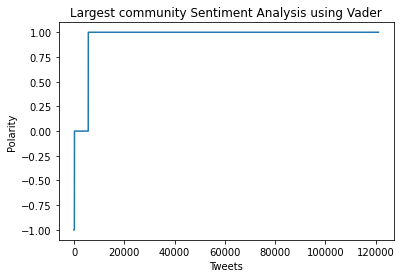

In [33]:
# plot rounded polarity
plt.plot(df.index, df['rounded_polarity'].sort_values())
plt.title('Largest community Sentiment Analysis using Vader')
plt.ylabel('Polarity')
plt.xlabel('Tweets')

In [34]:
# get amount of rounded negative, neutral, and positive polarity
num_rounded_sentiments = df.groupby('rounded_polarity').count()
num_rounded_sentiments

,id,created_at,cleaned_tweet,date,time,neg,neu,pos,compound
rounded_polarity,,,,,,,,,
-1,105,105,105,105,105,105,105,105,105
0,4621,4621,4621,4621,4621,4621,4621,4621,4621
1,96153,96153,96153,96153,96153,96153,96153,96153,96153


Text(0, 0.5, 'Count')

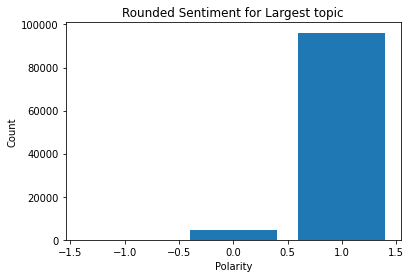

In [35]:
# plot rounded negative, neutral, and positive sentiment amounts
plt.bar(num_rounded_sentiments.index, num_rounded_sentiments["compound"])
plt.title('Rounded Sentiment for Largest topic')
plt.xlabel('Polarity')
plt.ylabel('Count')
# plt.savefig('../dataout/sentiment/rounded_largest_topic_sentiment.jpeg')
# plt.close()

## Split data into segments

In [36]:
# sort dataframe by date
df = df.sort_values(by=['date', 'time'])
df

,id,created_at,cleaned_tweet,date,time,neg,neu,pos,compound,rounded_polarity
28510,1356193045817872384,2021-02-01 10:49:53+00:00,a great project,2021-02-01,10:49:53,0.0,0.328,0.672,0.6249,1
28516,1356203583193063424,2021-02-01 11:31:45+00:00,dena great,2021-02-01,11:31:45,0.0,0.196,0.804,0.6249,1
28478,1356665511027875840,2021-02-02 18:07:18+00:00,thanks for opportunity,2021-02-02,18:07:18,0.0,0.149,0.851,0.6908,1
28485,1356802495968727040,2021-02-03 03:11:37+00:00,good project best nft,2021-02-03,03:11:37,0.0,0.220,0.780,0.7964,1
28487,1356805106969153536,2021-02-03 03:22:00+00:00,best nft i like it,2021-02-03,03:22:00,0.0,0.309,0.691,0.7717,1
...,...,...,...,...,...,...,...,...,...,...
28512,1399515472840724480,2021-05-31 23:57:45+00:00,amazing project. this project is going to be g...,2021-05-31,23:57:45,0.0,0.668,0.332,0.9081,1
28511,1399515534023036928,2021-05-31 23:57:59+00:00,thanks for giving us such a great opportunity....,2021-05-31,23:57:59,0.0,0.444,0.556,0.9571,1
28507,1399515936093204480,2021-05-31 23:59:35+00:00,such a beautiful project and congratulations t...,2021-05-31,23:59:35,0.0,0.463,0.537,0.9677,1
9108,1399515957362450432,2021-05-31 23:59:40+00:00,great project! reset,2021-05-31,23:59:40,0.0,0.313,0.687,0.6588,1


In [37]:
NUM_SEGMENTS = 35

In [38]:
# split df into n groups of equal length (returns list of sub dataframes)
# https://stackoverflow.com/questions/2130016/splitting-a-list-into-n-parts-of-approximately-equal-length
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

In [39]:
# list of dfs
sub_dfs = list(split(df, NUM_SEGMENTS))
sub_dfs

[                        id                created_at  \
 28510  1356193045817872384 2021-02-01 10:49:53+00:00   
 28516  1356203583193063424 2021-02-01 11:31:45+00:00   
 28478  1356665511027875840 2021-02-02 18:07:18+00:00   
 28485  1356802495968727040 2021-02-03 03:11:37+00:00   
 28487  1356805106969153536 2021-02-03 03:22:00+00:00   
 ...                    ...                       ...   
 18962  1376705899302113280 2021-03-30 01:20:39+00:00   
 18964  1376707821291536384 2021-03-30 01:28:17+00:00   
 18967  1376708291154210816 2021-03-30 01:30:09+00:00   
 18970  1376709810578583552 2021-03-30 01:36:11+00:00   
 18946  1376711107277172736 2021-03-30 01:41:20+00:00   
 
                                            cleaned_tweet        date  \
 28510                                    a great project  2021-02-01   
 28516                                         dena great  2021-02-01   
 28478                             thanks for opportunity  2021-02-02   
 28485                

In [40]:
sub_dfs[0]

,id,created_at,cleaned_tweet,date,time,neg,neu,pos,compound,rounded_polarity
28510,1356193045817872384,2021-02-01 10:49:53+00:00,a great project,2021-02-01,10:49:53,0.0,0.328,0.672,0.6249,1
28516,1356203583193063424,2021-02-01 11:31:45+00:00,dena great,2021-02-01,11:31:45,0.0,0.196,0.804,0.6249,1
28478,1356665511027875840,2021-02-02 18:07:18+00:00,thanks for opportunity,2021-02-02,18:07:18,0.0,0.149,0.851,0.6908,1
28485,1356802495968727040,2021-02-03 03:11:37+00:00,good project best nft,2021-02-03,03:11:37,0.0,0.220,0.780,0.7964,1
28487,1356805106969153536,2021-02-03 03:22:00+00:00,best nft i like it,2021-02-03,03:22:00,0.0,0.309,0.691,0.7717,1
...,...,...,...,...,...,...,...,...,...,...
18962,1376705899302113280,2021-03-30 01:20:39+00:00,a very good program hopefully in accordance wi...,2021-03-30,01:20:39,0.0,0.501,0.499,0.8737,1
18964,1376707821291536384,2021-03-30 01:28:17+00:00,good project bsc address:,2021-03-30,01:28:17,0.0,0.508,0.492,0.4404,1
18967,1376708291154210816,2021-03-30 01:30:09+00:00,"come on in, this is a very good project. thank...",2021-03-30,01:30:09,0.0,0.716,0.284,0.7474,1
18970,1376709810578583552,2021-03-30 01:36:11+00:00,good project bsc address:,2021-03-30,01:36:11,0.0,0.508,0.492,0.4404,1


## Sentiment analysis per segment

In [41]:
def get_avg_segment_sentiment(df):
    sumsentiment = 0
    count = 0
    for i in range(len(df.index)):
        sumsentiment += df['compound'].iloc[i]
        count += 1
    return sumsentiment / count

In [42]:
compounds = []
mns, mxs = [], []
dates = []
for sub_df in sub_dfs:
    compounds.append(sub_df.compound.mean())
    mxs.append(sub_df.index.max())
    mns.append(sub_df.index.min())
    dates.append(sub_df.date.iloc[0])

compound_df = pd.DataFrame(dict(
    mn=mns,
    mx=mxs,
    compouned=compounds,
    date=dates,
))

In [43]:
dates = df.groupby('date').count()
dates

,id,created_at,cleaned_tweet,time,neg,neu,pos,compound,rounded_polarity
date,,,,,,,,,
2021-02-01,2,2,2,2,2,2,2,2,2
2021-02-02,1,1,1,1,1,1,1,1,1
2021-02-03,6,6,6,6,6,6,6,6,6
2021-02-04,1,1,1,1,1,1,1,1,1
2021-02-06,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
2021-05-27,2752,2752,2752,2752,2752,2752,2752,2752,2752
2021-05-28,2560,2560,2560,2560,2560,2560,2560,2560,2560
2021-05-29,2165,2165,2165,2165,2165,2165,2165,2165,2165


In [44]:
compound_df

,mn,mx,compouned,date
0,17719,33854,0.587353,2021-02-01
1,18728,46075,0.652544,2021-03-30
2,35950,50129,0.655227,2021-04-05
3,28,42021,0.679681,2021-04-06
4,23,116685,0.645779,2021-04-14
5,50138,121131,0.668049,2021-04-23
6,67907,85631,0.741596,2021-04-30
7,42,121134,0.703607,2021-05-01
8,3,17710,0.734056,2021-05-06
9,7,103367,0.629186,2021-05-07


### Average overall sentiment

In [45]:
avg_sentiment = df['compound'].mean()
avg_sentiment

0.6740832284221691

## Plot average sentiment over time (per segment)

In [46]:
DATA_OUT = "../dataout/sentiment/sentiment_per_segment_largest_topic.jpeg"

In [47]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(compound_df.date, 'compouned', data=compound_df)

# Major ticks every month.
fmt_month = mdates.MonthLocator()

ax.xaxis.set_major_locator(fmt_month)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

#plot
plt.title('Sentiment per segment for largest topic (35 segments of ~3k)')
plt.xlabel('Date')
plt.ylabel('Vader Sentiment score')
# save graph
plt.savefig(DATA_OUT)
plt.close()

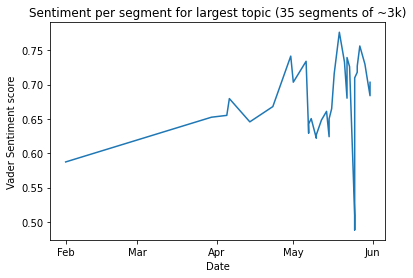

In [63]:
fig

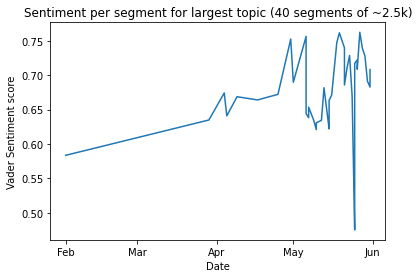

In [88]:
NUM_SEGMENTS = 40
run_sentiment_segments(NUM_SEGMENTS)

In [72]:
import matplotlib.dates as mdates

def run_sentiment_segments(NUM_SEGMENTS):
    # create segments
    sub_dfs = list(split(df, NUM_SEGMENTS))
    num_tweets_per_segment = round(len(sub_dfs[0]) / 1000, 1)
    
    # get compound vals
    compounds = []
    mns, mxs = [], []
    dates = []
    for sub_df in sub_dfs:
        compounds.append(sub_df.compound.mean())
        mxs.append(sub_df.index.max())
        mns.append(sub_df.index.min())
        dates.append(sub_df.date.iloc[0])

    compound_df = pd.DataFrame(dict(
        mn=mns,
        mx=mxs,
        compouned=compounds,
        date=dates,
    ))
    
    # get average sentiment
    avg_sentiment = df['compound'].mean()
    
    # plot
    fig, ax = plt.subplots()
    ax.plot(compound_df.date, 'compouned', data=compound_df)

    # Major ticks every month.
    fmt_month = mdates.MonthLocator()

    ax.xaxis.set_major_locator(fmt_month)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

    # plot
    plt.title('Sentiment per segment for largest topic ({} segments of ~{}k)'.format(NUM_SEGMENTS, num_tweets_per_segment))
    plt.xlabel('Date')
    plt.ylabel('Vader Sentiment score')